In [19]:
import numpy as np
import torch

In [20]:
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

In [21]:
print(x)
print(w)
print(b)

tensor(3.)
tensor(4., requires_grad=True)
tensor(5., requires_grad=True)


In [22]:
y = w * x + b
print(y)

tensor(17., grad_fn=<AddBackward0>)


In [23]:
y.backward()

In [24]:
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dw: tensor(3.)
dy/db: tensor(1.)


In [25]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [26]:
# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [27]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [28]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 1.3063,  0.3547,  0.7927],
        [ 0.5440,  0.3526, -0.8767]], requires_grad=True)
tensor([0.7709, 0.3580], requires_grad=True)


In [29]:
# Define the model
def model(x):
    return x @ w.t() + b

In [30]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[153.9793,  25.9981],
        [201.5869,  24.7842],
        [207.9200,  44.0891],
        [178.5952,  38.5727],
        [180.4408,  10.3759]], grad_fn=<AddBackward0>)


In [31]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [32]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [33]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(9001.8887, grad_fn=<DivBackward0>)


In [34]:
# Compute gradients
loss.backward()

In [35]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 1.3063,  0.3547,  0.7927],
        [ 0.5440,  0.3526, -0.8767]], requires_grad=True)
tensor([[ 9435.6113,  8651.8896,  5660.5820],
        [-5043.5352, -6385.8950, -3894.4456]])


In [36]:
# Gradients for bias
print(b)
print(b.grad)

tensor([0.7709, 0.3580], requires_grad=True)
tensor([108.3044, -63.2360])


In [37]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [38]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[153.9793,  25.9981],
        [201.5869,  24.7842],
        [207.9200,  44.0891],
        [178.5952,  38.5727],
        [180.4408,  10.3759]], grad_fn=<AddBackward0>)


In [39]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(9001.8887, grad_fn=<DivBackward0>)


In [40]:
# Compute gradients
loss.backward()

In [41]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [42]:
print(w)

tensor([[ 1.2120,  0.2681,  0.7360],
        [ 0.5945,  0.4165, -0.8378]], requires_grad=True)


In [43]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(6475.6475, grad_fn=<DivBackward0>)


In [44]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [45]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(431.0441, grad_fn=<DivBackward0>)


In [46]:
# Print predictions
preds

tensor([[ 64.0122,  76.0067],
        [ 86.6725,  93.8179],
        [ 97.5316, 139.3841],
        [ 60.1214,  68.7028],
        [ 87.0569,  88.7963]], grad_fn=<AddBackward0>)

In [47]:
# Print targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

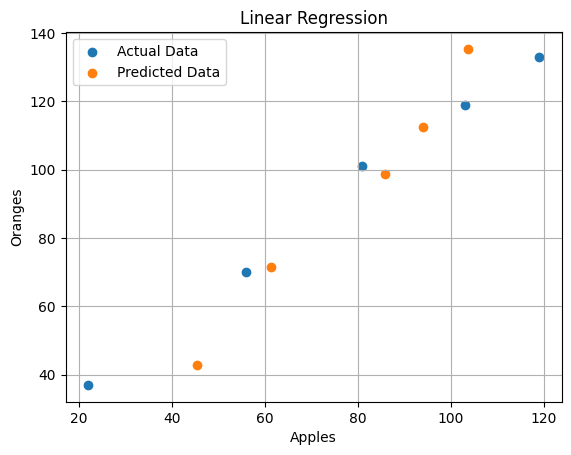

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Define the training data (using the inputs and targets you provided earlier)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

# Define DataLoader
batch_size = 5
train_ds = TensorDataset(inputs, targets)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

# Define the linear regression model
model = nn.Linear(3, 2)
opt = torch.optim.SGD(model.parameters(), lr=1e-5)
loss_fn = F.mse_loss

# Training the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            loss.backward()
            opt.step()
            opt.zero_grad()

# Train the model for 100 epochs
fit(100, model, loss_fn, opt)

# Get the final predictions from the model
preds = model(inputs)

# Extract the predicted values for apples and oranges
predicted_apples = preds[:, 0]
predicted_oranges = preds[:, 1]

# Plot the linear regression graph
plt.scatter(targets[:, 0], targets[:, 1], label="Actual Data")
plt.scatter(predicted_apples.detach().numpy(), predicted_oranges.detach().numpy(), label="Predicted Data")
plt.xlabel("Apples")
plt.ylabel("Oranges")
plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()
